In [1]:
!pip install datasets opencv-python matplotlib numpy pillow

from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt

c:\AI\anime-face-classifier\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt

# Load the anime faces dataset
ds = load_dataset("huggan/anime-faces")

Retrying in 1s [Retry 1/5].
HTTP Error 429 thrown while requesting GET https://huggingface.co/api/resolve-cache/datasets/huggan/anime-faces/67ebcf8c69b45feb3883d695f04227078a6c9da9/images%2F10342.png
Retrying in 1s [Retry 1/5].
Retrying in 1s [Retry 1/5].
HTTP Error 429 thrown while requesting HEAD https://huggingface.co/datasets/huggan/anime-faces/resolve/67ebcf8c69b45feb3883d695f04227078a6c9da9/images/10353.png
Retrying in 1s [Retry 1/5].
HTTP Error 429 thrown while requesting HEAD https://huggingface.co/datasets/huggan/anime-faces/resolve/67ebcf8c69b45feb3883d695f04227078a6c9da9/images/10354.png
Retrying in 1s [Retry 1/5].
HTTP Error 429 thrown while requesting HEAD https://huggingface.co/api/resolve-cache/datasets/huggan/anime-faces/67ebcf8c69b45feb3883d695f04227078a6c9da9/images%2F10348.png
Retrying in 1s [Retry 1/5].
HTTP Error 429 thrown while requesting HEAD https://huggingface.co/api/resolve-cache/datasets/huggan/anime-faces/67ebcf8c69b45feb3883d695f04227078a6c9da9/images%2F10

HTTPError: 429 Client Error: Too Many Requests for url: https://huggingface.co/api/resolve-cache/datasets/huggan/anime-faces/67ebcf8c69b45feb3883d695f04227078a6c9da9/images%2F10337.png

In [4]:
ds = load_dataset("huggan/anime-faces")


Retrying in 1s [Retry 1/5].
HTTP Error 429 thrown while requesting HEAD https://huggingface.co/api/resolve-cache/datasets/huggan/anime-faces/67ebcf8c69b45feb3883d695f04227078a6c9da9/images%2F10646.png
Retrying in 1s [Retry 1/5].
HTTP Error 429 thrown while requesting GET https://huggingface.co/api/resolve-cache/datasets/huggan/anime-faces/67ebcf8c69b45feb3883d695f04227078a6c9da9/images%2F10643.png
Retrying in 1s [Retry 1/5].
Retrying in 1s [Retry 1/5].
HTTP Error 429 thrown while requesting GET https://huggingface.co/api/resolve-cache/datasets/huggan/anime-faces/67ebcf8c69b45feb3883d695f04227078a6c9da9/images%2F10648.png
Retrying in 1s [Retry 1/5].
HTTP Error 429 thrown while requesting HEAD https://huggingface.co/datasets/huggan/anime-faces/resolve/67ebcf8c69b45feb3883d695f04227078a6c9da9/images/10656.png
Retrying in 1s [Retry 1/5].
HTTP Error 429 thrown while requesting GET https://huggingface.co/api/resolve-cache/datasets/huggan/anime-faces/67ebcf8c69b45feb3883d695f04227078a6c9da9/i

HTTPError: 429 Client Error: Too Many Requests for url: https://huggingface.co/api/resolve-cache/datasets/huggan/anime-faces/67ebcf8c69b45feb3883d695f04227078a6c9da9/images%2F1064.png

In [6]:
from datasets import load_dataset
import numpy as np

ds_small = load_dataset("huggan/few-shot-anime-face")
print(ds_small)

Repo card metadata block was not found. Setting CardData to empty.
Generating train split: 100%|██████████| 120/120 [00:00<00:00, 5144.07 examples/s]

DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 120
    })
})


In [7]:
import matplotlib.pyplot as plt

# Normalize image to range 0–1 (pixel-wise)
def preprocess(example):
    img = np.array(example["image"]).astype("float32") / 255.0
    return {"pixel_values": img}

# Apply preprocessing
ds_processed = ds_small["train"].map(preprocess)

Map: 100%|██████████| 120/120 [00:04<00:00, 27.39 examples/s] 


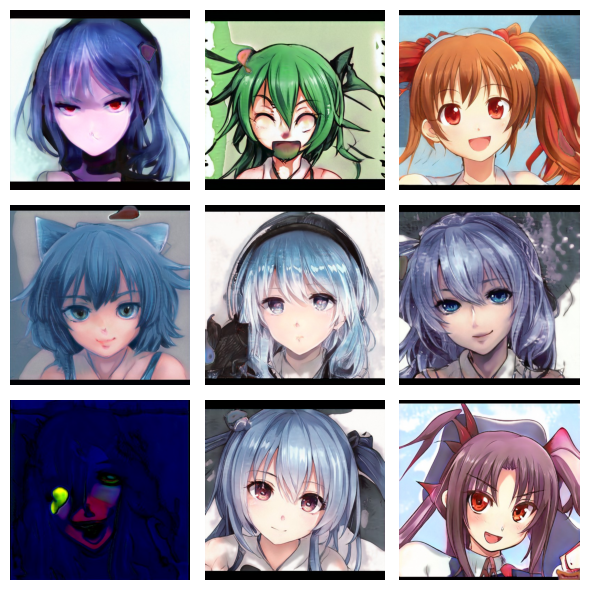

In [8]:
# Show 9 sample normalized images
fig, axes = plt.subplots(3, 3, figsize=(6, 6))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(ds_processed[i]["pixel_values"])
    ax.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
# Convert all images to a NumPy array (float32, shape: [num_samples, 64, 64, 3]) we kinda zipped it into X_data not like before 1 seperate array for every single image (100 seperate images)
X_data = np.stack([example["pixel_values"] for example in ds_processed])

print("Shape of dataset:", X_data.shape)

Shape of dataset: (120, 512, 512, 3)


In [ ]:
# basically for cnn architecture - we need dummy label so that we have y value too, like we already have X but some libraries need y too so we will take 0 as a dummy value for all X resp. Value , later we can use this to assign values like gojo = 1 and naruto 2
import numpy as np

# Assuming X_data already exists from Step 7.1
num_samples = X_data.shape[0]

# Create dummy labels (all zeros) 7.2
y_data = np.zeros((num_samples,), dtype=np.int64)

# Print info to confirm
print("✅ Dummy labels created.")
print("Shape of y_data:", y_data.shape)
print("First 10 labels:", y_data[:10])

✅ Dummy labels created.
Shape of y_data: (120,)
First 10 labels: [0 0 0 0 0 0 0 0 0 0]


In [ ]:
# saving all preprocessed data 


In [12]:
import os

# Create a folder called "data" if it doesn't already exist
if not os.path.exists("data"):
    os.makedirs("data")

print("✅ 'data' folder created (or already exists).")

✅ 'data' folder created (or already exists).


In [13]:
import numpy as np

# Save the NumPy arrays into the 'data' folder
np.save("data/X_anime.npy", X_data)
np.save("data/y_anime.npy", y_data)

print("✅ Data saved successfully as X_anime.npy and y_anime.npy!")

✅ Data saved successfully as X_anime.npy and y_anime.npy!
